Custom Collection by Simon Worthington (April 23): Paintings by Lucas Cranach the Elder https://www.wikidata.org/wiki/Q191748.

The collection Notebook only contains the SPARQL query and needs additional Python adding to parse the metadata output.

Madonna under the Fir Tree


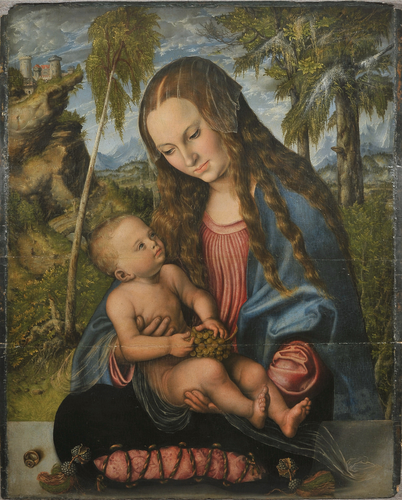




Saint Eustace


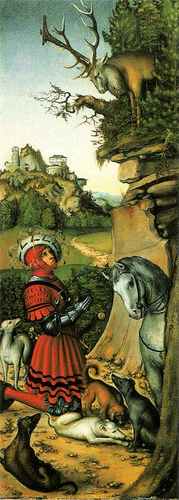




Judith with two female companions


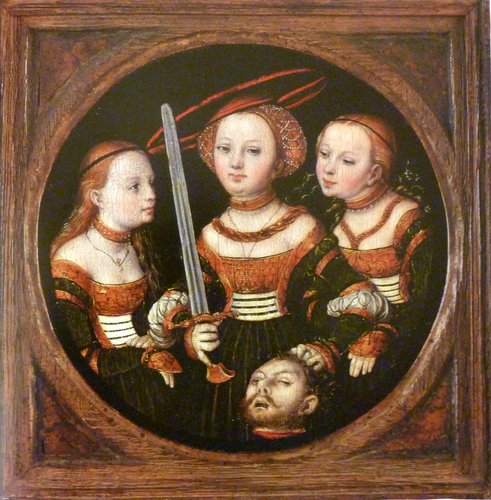




Maria Hilf


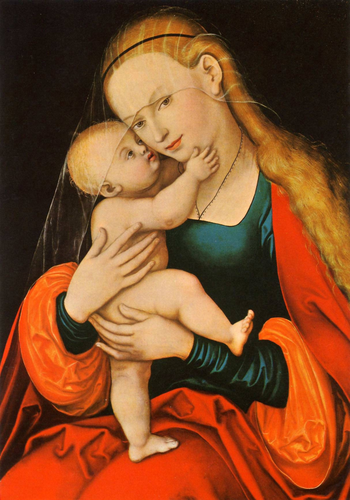




Cupid Complaining to Venus


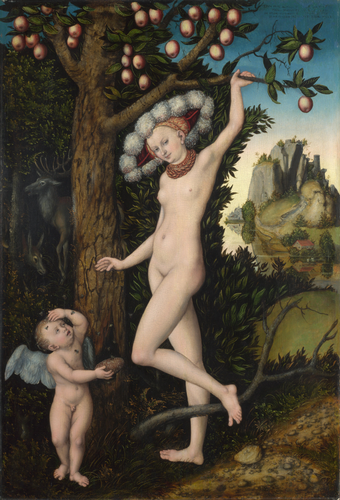




The Three Graces


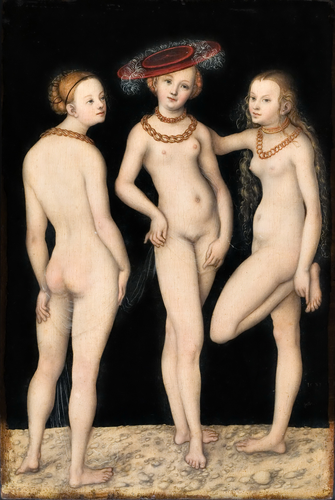




The Crucifixion with the Converted Centurion


c:\Users\simon\AppData\Local\Programs\Python\Python39\lib\site-packages\PIL\Image.py:3074: DecompressionBombWarning: Image size (121328284 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


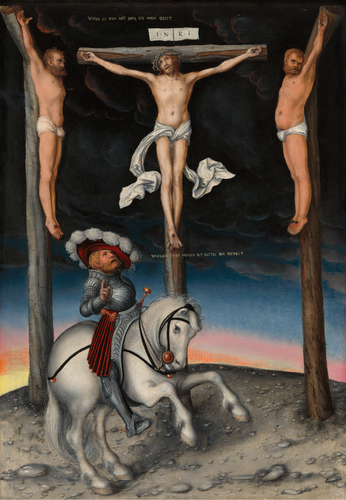




Madonna with Child with Young John the Baptist


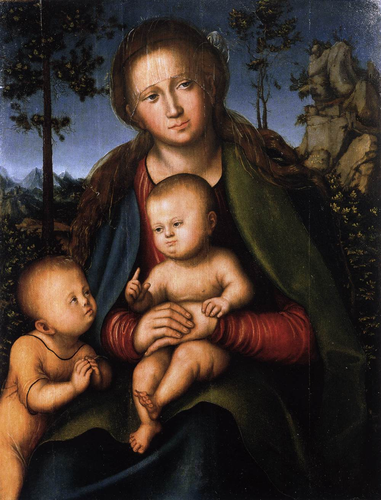




Female Portrait


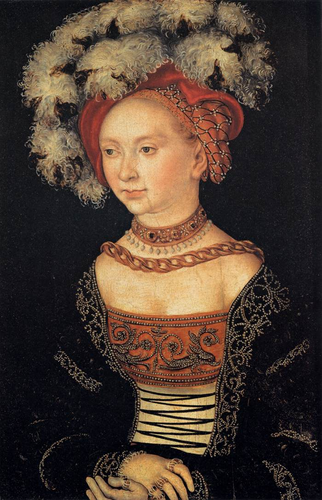




Melancholy


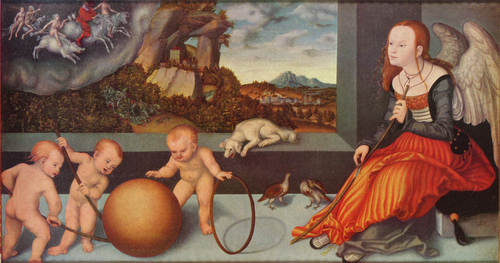




Melancholy


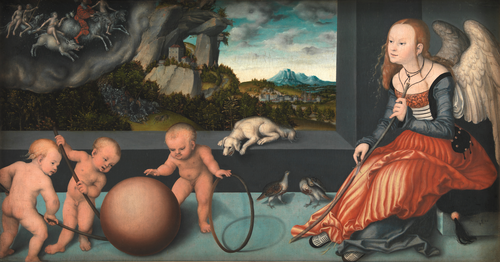




Cardinal Albrecht of Brandenburg in front of the Crucified Christ


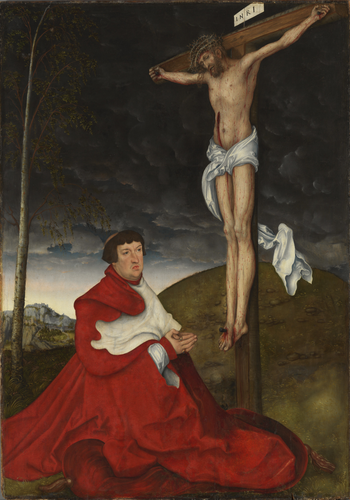




A Faun and His Family with a Slain Lion


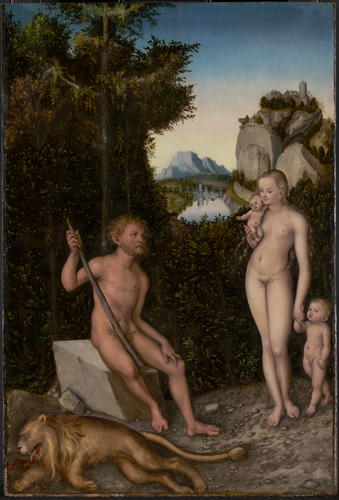




Rest on the Flight to Egypt


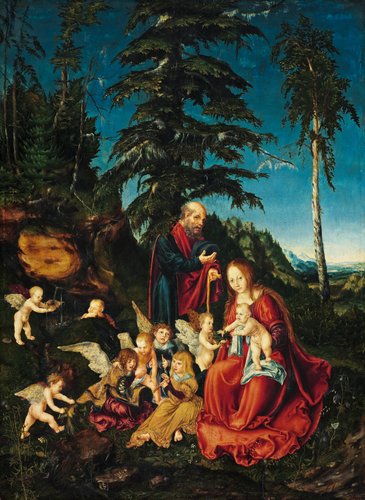




The Crucifixion


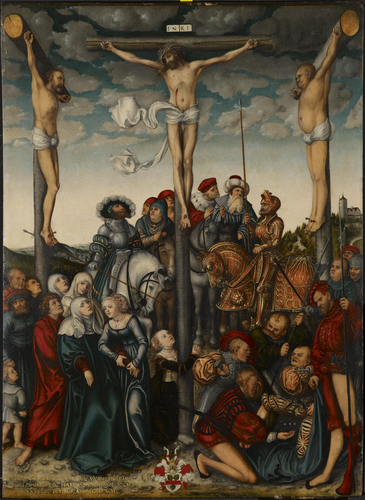




Adam and Eve


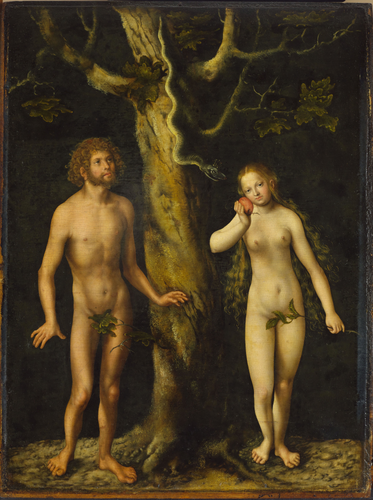




Christ blessing the children.


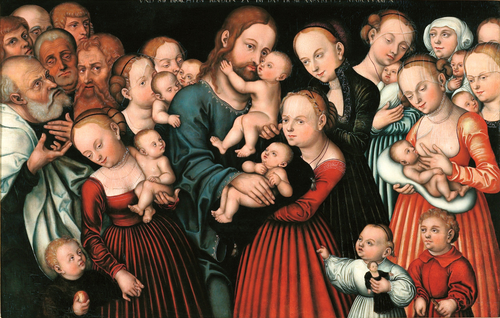




Portrait of a girl with forget-me-nots


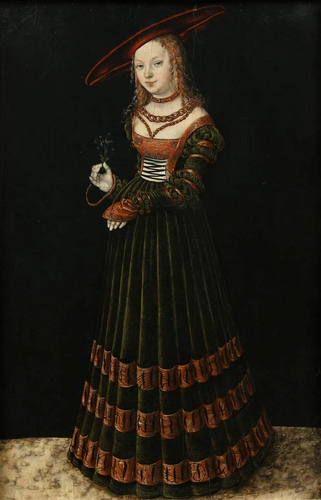




Herkules and Omphale


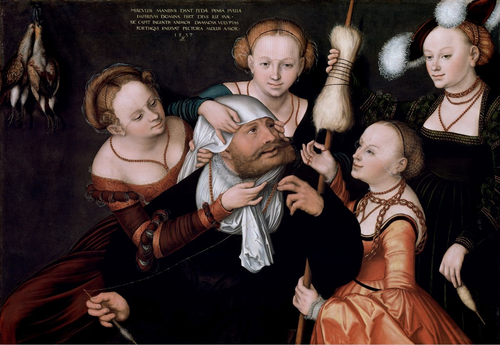




Madonna and Child


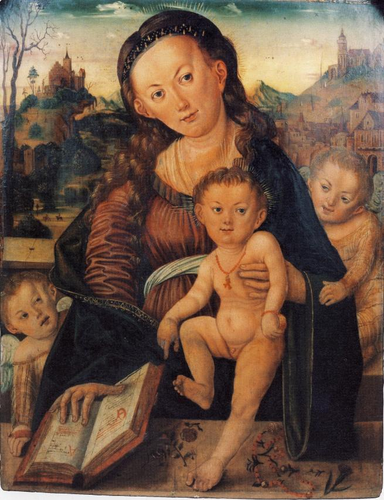




Virgin and Child with Saint Catherine of Alexandria


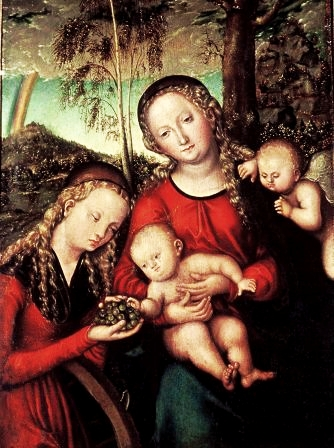




The Mystic Marriage of Saint Catherine of Alexandria with Saints Dorothy, Margaret and Barbara


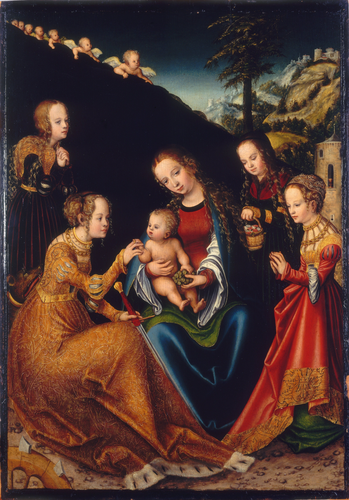

In [1]:
# pip install sparqlwrapper
# https://rdflib.github.io/sparqlwrapper/

import sys
from SPARQLWrapper import SPARQLWrapper, JSON
import requests
from PIL import Image


# SUBROUTINES

def get_delay(date):
    try:
        date = datetime.datetime.strptime(date, '%a, %d %b %Y %H:%M:%S GMT')
        timeout = int((date - datetime.datetime.now()).total_seconds())
    except ValueError:
        timeout = int(date)
    return timeout

def get_image(url, headers):
    r = requests.get(url, headers=headers, stream=True)
    if r.status_code == 200:
        im = Image.open(r.raw)
        return im
    if r.status_code == 500:
        return None
    if r.status_code == 403:
        return None
    if r.status_code == 429:
        timeout = get_delay(r.headers['retry-after'])
        print('Timeout {} m {} s'.format(timeout // 60, timeout % 60))
        time.sleep(timeout)
        get_image(url, headers)

endpoint_url = "https://query.wikidata.org/sparql"

query = """#defaultView:ImageGrid
SELECT ?item ?itemLabel ?pic WHERE {
  ?item wdt:P31 wd:Q3305213;
    wdt:P170 wd:Q191748;
    wdt:P18 ?pic.
  SERVICE wikibase:label { bd:serviceParam wikibase:language "en". } 
}
LIMIT 22"""


def get_results(endpoint_url, query):
    user_agent = "WDQS-example Python/%s.%s" % (sys.version_info[0], sys.version_info[1])
    # TODO adjust user agent; see https://w.wiki/CX6
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    return sparql.query().convert()


results = get_results(endpoint_url, query)

for result in results["results"]["bindings"]:
  print(result['itemLabel']['value'])

  # get image from image URL and display resized version
  image_url=result['pic']['value']
  user_agent = "WDQS-example Python/%s.%s" % (sys.version_info[0], sys.version_info[1])
  headers = {'User-Agent': user_agent}
  im = get_image(image_url, headers)
  im.thumbnail((500, 500), Image.Resampling.LANCZOS)
  display(im)
  print('\n\n')
